In [180]:
#import libraries
import os as os
os.environ['USE_PYGEOS'] = '0'
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
import networkx as nx
import rasterio
from shapely.geometry import Polygon

In [181]:
point = (43.9826, -124.0998)
g = ox.graph_from_point(point, dist=8000, network_type='walk')

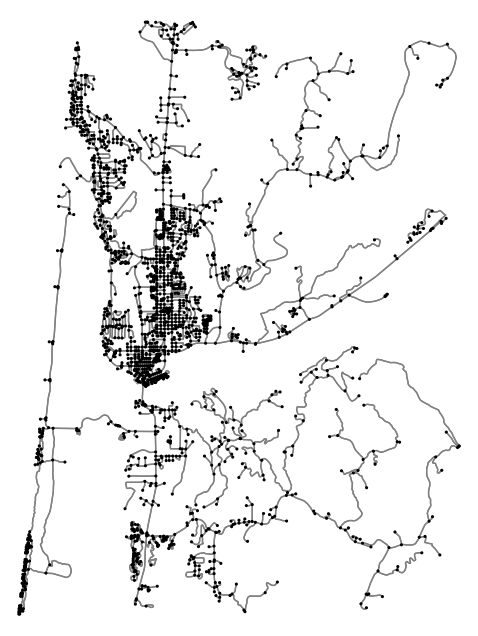

In [182]:
fig, ax = ox.plot_graph(g, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

<AxesSubplot: >

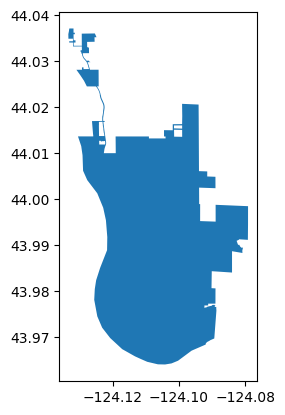

In [183]:
ox.settings.log_console=True
# define the place query for Florence on osmnx
query = {'city': 'Florence'}

# get the boundaries of the city limits
gdf_florence = ox.geocode_to_gdf(query, which_result=5)
gdf_florence.plot()

In [184]:
gdf_florence.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-124.13343 44.03592, -124.13340 44.0...",44.037147,43.964126,-124.07913,-124.133426,298040886,relation,186708,43.980009,-124.101309,"Florence, Lane County, Oregon, United States",boundary,administrative,0.550908


In [185]:
cities = gpd.read_file('data/oregon_cities.shp')
cities.head()

,City,lat,lon,geometry
0,Adair Village city,44.67,-123.22,POINT (-123.22000 44.67000)
1,Adams,45.77,-118.56,POINT (-118.56000 45.77000)
2,Adrian,43.74,-117.07,POINT (-117.07000 43.74000)
3,Albany,44.63,-123.10,POINT (-123.10000 44.63000)
4,Aloha,45.49,-122.87,POINT (-122.87000 45.49000)


In [186]:
florence = cities[cities["City"]=="Florence"]
florence.head()

,City,lat,lon,geometry
104,Florence,43.99,-124.11,POINT (-124.11000 43.99000)


In [187]:
ev_zones = gpd.read_file('EvacuationBrochure_Data/EvacuationZones.shp')

<AxesSubplot: >

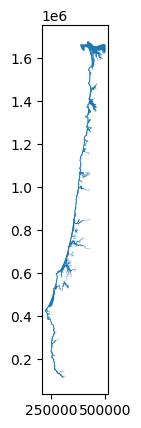

In [188]:
ev_zones.plot()

In [189]:
# Specify type of data
tags = {'building': True}

# Download building geometries from OSM
gdf = ox.geometries_from_place('Florence, Oregon, USA', tags)

In [190]:
print(gdf.shape)

(3785, 53)


In [191]:
ev_zones.head()

,Id,Location,Type,geometry
0,1,Central Coast Model - Grid A,Local Tsunami Evacuation Zone,"POLYGON ((406752.100 1221857.044, 406766.586 1..."
1,1,Central Coast Model - Grid B,Local Tsunami Evacuation Zone,"POLYGON ((416074.855 1068832.798, 416052.962 1..."
2,1,Central Coast Model - Grid C,Local Tsunami Evacuation Zone,"POLYGON ((358894.444 856603.498, 358871.635 85..."
3,1,Coos Bay Model,Local Tsunami Evacuation Zone,"POLYGON ((335929.356 650082.869, 335836.290 65..."
4,1,Bandon Model,Local Tsunami Evacuation Zone,"POLYGON ((326110.596 542886.775, 326111.186 54..."


In [192]:
or_cities = gpd.read_file('citylim_2021/citylim_2021.shp')

In [193]:
or_cities

,FID,CITY_NAME,instName,unitID,descriptn,instCode,codeRef,effDate,unitOwner,cSteward,acres,EFFECTV_DT,GIS_PRC_DT,Shape_Leng,Shape_Area,Shape__Are,Shape__Len,geometry
0,1,Adair Village,Adair Village,ODOT,Incorporated City Limit Boundary,00275,FIPS,20210000,2409661,ODOT,286.389671,2021,9/20/2021,24645.761574,1.247513e+07,2.292784e+06,10567.896721,"POLYGON ((-13716191.298 5571313.822, -13716177..."
1,2,Adams,Adams,ODOT,Incorporated City Limit Boundary,00350,FIPS,20210000,2409662,ODOT,230.591317,2021,9/20/2021,14345.564615,1.004456e+07,1.916881e+06,6266.173036,"POLYGON ((-13198645.973 5742114.630, -13198672..."
2,3,Adrian,Adrian,ODOT,Incorporated City Limit Boundary,00500,FIPS,20210000,2409664,ODOT,155.900900,2021,9/20/2021,10511.276609,6.791043e+06,1.209549e+06,4436.148400,"POLYGON ((-13031686.562 5425944.492, -13031686..."
3,4,Albany,Albany,ODOT,Incorporated City Limit Boundary,01000,FIPS,20210000,2409675,ODOT,11342.259180,2021,9/20/2021,262984.796754,4.940688e+08,9.067044e+07,112682.929649,"POLYGON ((-13706200.198 5570401.686, -13706041..."
4,5,Amity,Amity,ODOT,Incorporated City Limit Boundary,02000,FIPS,20210000,2409700,ODOT,402.796064,2021,9/20/2021,28212.961728,1.754580e+07,3.274057e+06,12190.267995,"POLYGON ((-13715105.640 5640690.918, -13715070..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,237,Woodburn,Woodburn,ODOT,Incorporated City Limit Boundary,83750,FIPS,20210000,2412296,ODOT,3854.545975,2021,9/20/2021,119361.079285,1.679040e+08,3.136511e+07,51585.577148,"POLYGON ((-13679069.773 5646106.517, -13679016..."
237,238,Wood Village,Wood Village,ODOT,Incorporated City Limit Boundary,83950,FIPS,20210000,2412294,ODOT,609.367295,2021,9/20/2021,27136.816105,2.654404e+07,5.025360e+06,11806.889661,"POLYGON ((-13626994.915 5706109.799, -13626994..."
238,239,Yachats,Yachats,ODOT,Incorporated City Limit Boundary,84200,FIPS,20210000,2412313,ODOT,591.067517,2021,9/20/2021,39230.042590,2.574690e+07,4.674863e+06,16716.842580,"POLYGON ((-13815340.626 5515900.003, -13815199..."
239,240,Yamhill,Yamhill,ODOT,Incorporated City Limit Boundary,84250,FIPS,20210000,2412316,ODOT,311.874274,2021,9/20/2021,26187.901874,1.358524e+07,2.554732e+06,11357.093437,"POLYGON ((-13713065.483 5676156.173, -13713066..."


In [194]:
florence = or_cities[or_cities["CITY_NAME"]=="Florence"]
florence.head()

,FID,CITY_NAME,instName,unitID,descriptn,instCode,codeRef,effDate,unitOwner,cSteward,acres,EFFECTV_DT,GIS_PRC_DT,Shape_Leng,Shape_Area,Shape__Are,Shape__Len,geometry
66,67,Florence,Florence,ODOT,Incorporated City Limit Boundary,26050,FIPS,20210000,2410511,ODOT,3805.342939,2021,9/20/2021,111542.73731,1.657607e+08,2.977346e+07,47297.570112,"POLYGON ((-13818253.942 5471062.805, -13818251..."


<AxesSubplot: >

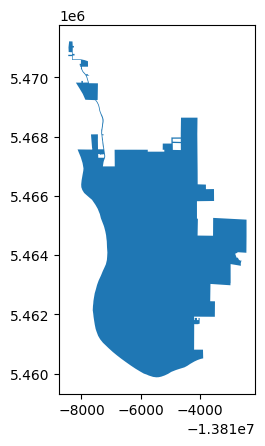

In [195]:
florence.plot()

In [196]:
florence.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [197]:
florence_reproject = florence.to_crs('EPSG:32610')
florence_reproject.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [198]:
# Define coordinates of Florence
lat_lon = (43.9826, -124.0998)

# Define walkable street network 3.2 km around Florence
g = ox.graph_from_point(lat_lon, dist=3200, network_type='walk')

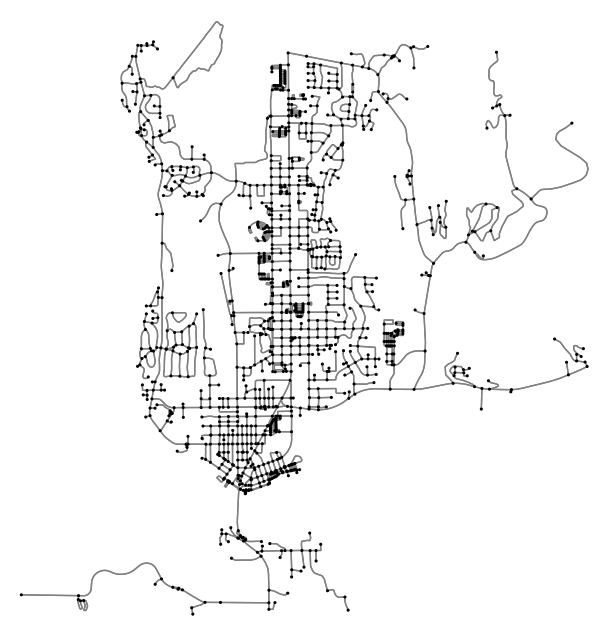

In [199]:
fig, ax = ox.plot_graph(g, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [200]:
nodes = ox.graph_to_gdfs(g, nodes=True, edges=False)
edges = ox.graph_to_gdfs(g, nodes=False, edges=True)

In [201]:
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
39650624,44.008786,-124.091264,3,NaN,POINT (-124.09126 44.00879)
39663236,43.985646,-124.119197,3,NaN,POINT (-124.11920 43.98565)
39663237,43.985664,-124.119719,3,NaN,POINT (-124.11972 43.98566)
39678876,43.994689,-124.072473,3,NaN,POINT (-124.07247 43.99469)
39678885,43.995042,-124.074016,3,NaN,POINT (-124.07402 43.99504)


In [202]:
nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [203]:
nodes_reproject = nodes.to_crs('EPSG:32610')
nodes_reproject.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [204]:
edges_reproject = edges.to_crs('EPSG:32610')
edges_reproject.crs

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [205]:
points_clip = gpd.clip(nodes_reproject, florence_reproject)

<AxesSubplot: >

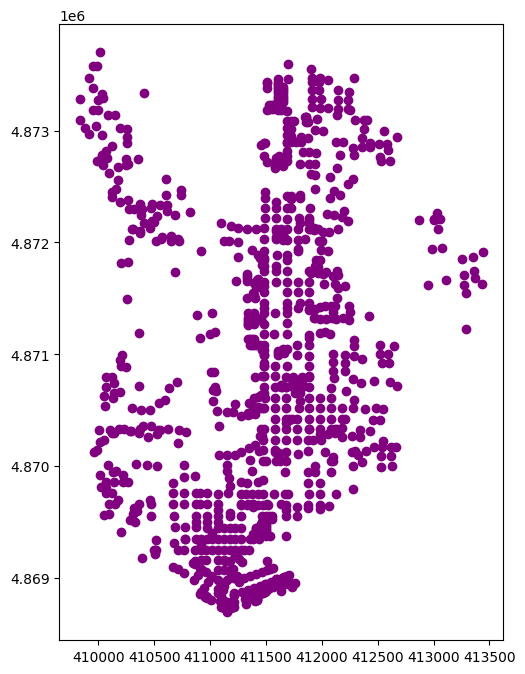

In [206]:
fig, ax = plt.subplots(figsize=(12, 8))
points_clip.plot(ax=ax, color="purple")

<AxesSubplot: >

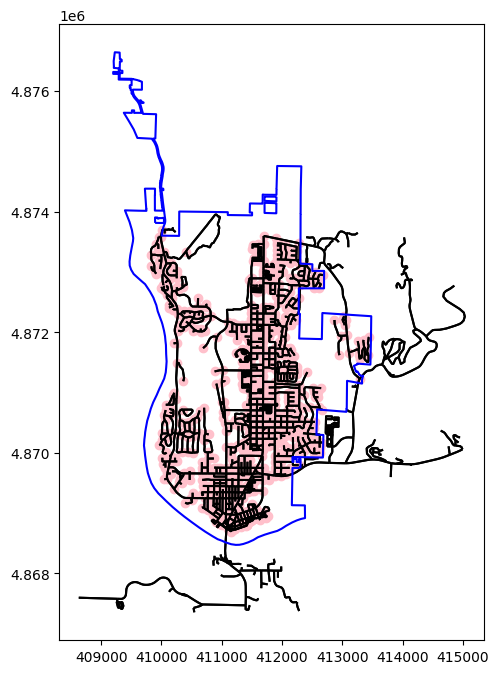

In [207]:
fig, ax = plt.subplots(figsize=(12, 8))
edges_reproject.plot(ax=ax, color="black")
points_clip.plot(ax=ax, color="pink")
florence_reproject.boundary.plot(ax=ax, color="blue")

In [208]:
ev_zones = gpd.read_file('EvacuationBrochure_Data/EvacuationZones.shp')
facilities = gpd.read_file('EvacuationBrochure_Data/CriticalFacilities.shp')
assemb_areas = gpd.read_file('EvacuationBrochure_Data/Assembly_Areas.shp')

<AxesSubplot: >

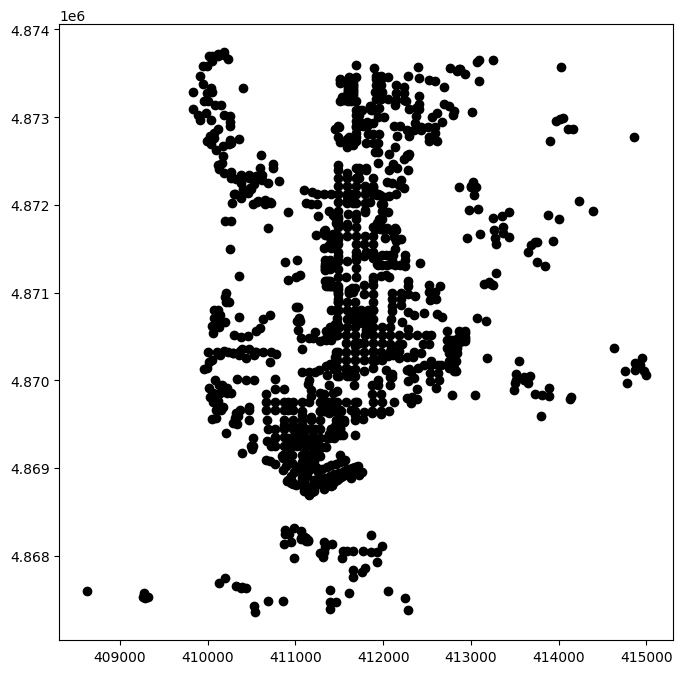

In [209]:
fig, ax = plt.subplots(figsize=(12, 8))
nodes_reproject.plot(ax=ax, color="black")

In [210]:
nodes_reproject.head()

,y,x,street_count,highway,geometry
osmid,,,,,
39650624,44.008786,-124.091264,3,NaN,POINT (412521.591 4873427.517)
39663236,43.985646,-124.119197,3,NaN,POINT (410247.558 4870887.437)
39663237,43.985664,-124.119719,3,NaN,POINT (410205.668 4870890.005)
39678876,43.994689,-124.072473,3,NaN,POINT (414007.576 4871842.008)
39678885,43.995042,-124.074016,3,NaN,POINT (413884.366 4871882.826)


In [211]:
node_id = nodes_reproject.values

In [212]:
node_id

array([[44.0087861, -124.0912641, 3, nan,
        <POINT (412521.591 4873427.517)>],
       [43.9856464, -124.1191967, 3, nan,
        <POINT (410247.558 4870887.437)>],
       [43.9856644, -124.1197194, 3, nan,
        <POINT (410205.668 4870890.005)>],
       ...,
       [43.9737901, -124.1182429, 1, nan,
        <POINT (410306.198 4869569.542)>],
       [43.9758934, -124.1218165, 1, nan,
        <POINT (410022.736 4869807.043)>],
       [43.9758532, -124.1212802, 3, nan,
        <POINT (410065.691 4869801.993)>]], dtype=object)

In [213]:
array_nodes = nodes_reproject.index.values
array_nodes

array([   39650624,    39663236,    39663237, ..., 10726000732,
       10726000754, 10726000757])

In [214]:
assembly_areas= assemb_areas.to_crs('EPSG:32610')

In [215]:
assembly_areas.crs
    

<Derived Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [216]:
assemb_nodes = assembly_areas.index.values

In [217]:
assemb_nodes

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

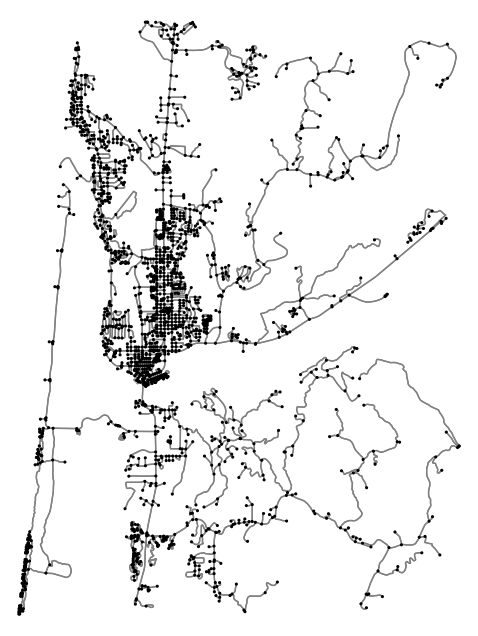

In [218]:
point = (43.9826, -124.0998)
g = ox.graph_from_point(point, dist=8000, network_type='walk')
fig, ax = ox.plot_graph(g, bgcolor='white', node_color='black', edge_color='grey', node_size=5)

In [219]:
type(g)

networkx.classes.multidigraph.MultiDiGraph

<AxesSubplot: >

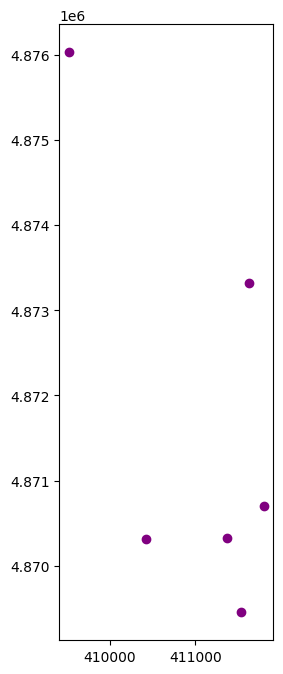

In [220]:
assemb_clip = gpd.clip(assembly_areas, florence_reproject)
fig, ax = plt.subplots(figsize=(12, 8))
assemb_clip.plot(ax=ax, color="purple")

In [221]:
assemb_array = assemb_clip.index.values

In [222]:
assemb_array

array([ 97,  95, 249,  96,  94, 248])

In [223]:
lat_lon = (43.9826, -124.0998)
flo_ntwrk = ox.graph_from_point(lat_lon, dist=8000, network_type='walk')
graph_proj= ox.project_graph(flo_ntwrk, to_crs=None)

In [224]:
import folium

In [225]:
for i in array_nodes:
    for x in assemb_nodes:
        route = ox.distance.shortest_path(graph_proj, i , x , weight='length', cpus=1)
        m = ox.plot_route_folium(g, route, weight=5)  

NodeNotFound: Either source 39650624 or target 0 is not in G

<AxesSubplot: >

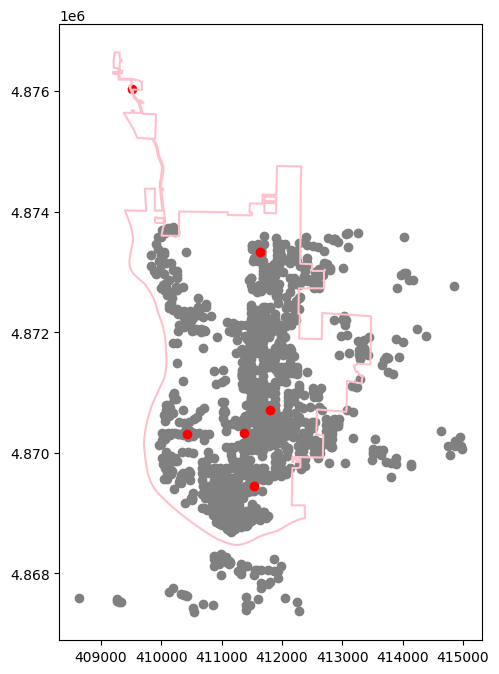

In [127]:
fig, ax = plt.subplots(figsize=(12, 8))
nodes_reproject.plot(ax=ax, color="grey")
assemb_clip.plot(ax=ax, color="red")
florence_reproject.boundary.plot(ax=ax, color="pink")

In [139]:
nodes_reproject

,y,x,street_count,highway,geometry
osmid,,,,,
39650624,44.008786,-124.091264,3,NaN,POINT (412521.591 4873427.517)
39663236,43.985646,-124.119197,3,NaN,POINT (410247.558 4870887.437)
39663237,43.985664,-124.119719,3,NaN,POINT (410205.668 4870890.005)
39678876,43.994689,-124.072473,3,NaN,POINT (414007.576 4871842.008)
39678885,43.995042,-124.074016,3,NaN,POINT (413884.366 4871882.826)
...,...,...,...,...,...
10726000730,43.973980,-124.118054,3,NaN,POINT (410321.627 4869590.407)
10726000731,43.974123,-124.117899,3,NaN,POINT (410334.292 4869606.154)
10726000732,43.973790,-124.118243,1,NaN,POINT (410306.198 4869569.542)


In [148]:
assemb_clip

,Location,notes,County,Evac_Map,geometry
97,Florence Events Center,None,Lane,Florence,POINT (411539.241 4869452.541)
95,Greentrees Clubhouse,None,Lane,Florence,POINT (410426.232 4870311.088)
249,Miller Park,None,Lane,Florence,POINT (411374.567 4870324.635)
96,Grocery Outlet / Florence Cinemas,None,Lane,Florence,POINT (411801.707 4870704.576)
94,Fred Meyer,None,Lane,Florence,POINT (411633.250 4873325.055)
248,Rhododendron Dr,South of Heceta Beach Rd,Lane,Florence,POINT (409518.044 4876029.585)


In [158]:
x_1 = assemb_clip['geometry'].x
y_1 = assemb_clip['geometry'].y


97     411539.240928
95     410426.232136
249    411374.566738
96     411801.706510
94     411633.249520
248    409518.044480
dtype: float64

In [159]:
# Get x and y coordinates of first node
orig_xy = [x_1, y_1]
target_xy = [nodes_reproject.y.values[0], nodes_reproject.x.values[0]]

In [160]:
# Find the node in the graph that is closest to the origin point
orig_node = ox.distance.nearest_nodes(g, X=orig_xy[1], Y=orig_xy[0], return_dist=False)

# Find the node in the graph that is closest to the target point
target_node = ox.distance.nearest_nodes(g, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [165]:
# Calculate the shortest path
route = nx.shortest_path(G=g, source=orig_node, target=target_node, weight='length', method= 'dijkstra')
#length = nx.shortest_path_length(G=g, source=orig_node, target=target_node, weight='length')

IndexError: tuple index out of range

In [167]:
nodes_reproject.index.values

array([   39650624,    39663236,    39663237, ..., 10726000732,
       10726000754, 10726000757])

In [176]:
ox.distance.k_shortest_paths(g, array_nodes[0] ,assemb_nodes[0], 1, weight='length')

<generator object k_shortest_paths at 0x7f8fe1826d50>

In [179]:
route = ox.distance.shortest_path(g, array_nodes[0], array_nodes[0], weight=edges_reproject, cpus=1)

In [178]:
m = ox.plot_route_folium(g, route, weight=5)
m

ValueError: graph contains no edges

In [230]:
edges_length = str(edges_reproject['length'])

In [232]:
route = ox.distance.shortest_path(g, array_nodes[0], array_clip[0], weight=edges_length[0], cpus=1)

In [233]:
m = ox.plot_route_folium(g, route, weight=5)
m

ValueError: graph contains no edges

In [268]:
assem_nodes = assemb_clip.index.values

In [269]:
assem_nodes[0]

97

In [271]:
route = ox.distance.k_shortest_paths(g, array_nodes[0], assem_nodes[0], 1, weight='length')

In [252]:
array_nodes[0]

39650624

In [272]:
m = ox.plot_route_folium(g, route, weight=5)
m

TypeError: 'generator' object is not subscriptable

In [276]:
assemb_clip

,Location,notes,County,Evac_Map,geometry
97,Florence Events Center,None,Lane,Florence,POINT (411539.241 4869452.541)
95,Greentrees Clubhouse,None,Lane,Florence,POINT (410426.232 4870311.088)
249,Miller Park,None,Lane,Florence,POINT (411374.567 4870324.635)
96,Grocery Outlet / Florence Cinemas,None,Lane,Florence,POINT (411801.707 4870704.576)
94,Fred Meyer,None,Lane,Florence,POINT (411633.250 4873325.055)
248,Rhododendron Dr,South of Heceta Beach Rd,Lane,Florence,POINT (409518.044 4876029.585)


In [285]:
one = assemb_clip.iloc[1]

In [286]:
one


Location                            Greentrees Clubhouse
notes                                               None
County                                              Lane
Evac_Map                                        Florence
geometry    POINT (410426.23213562183 4870311.087817253)
Name: 95, dtype: object

In [288]:
x_1 = one['geometry'].x

410426.23213562183

In [298]:
y_1 = one['geometry'].y
y_1

4870311.087817253

In [291]:
node_1 = nodes_reproject.iloc[1]

In [294]:
node_x = node_1['geometry'].x

In [295]:
node_x

410247.558386332

In [296]:
node_y = node_1['geometry'].y

In [ ]:
orig_xy = [x_1, y_1]
target_xy = [node_x, ]